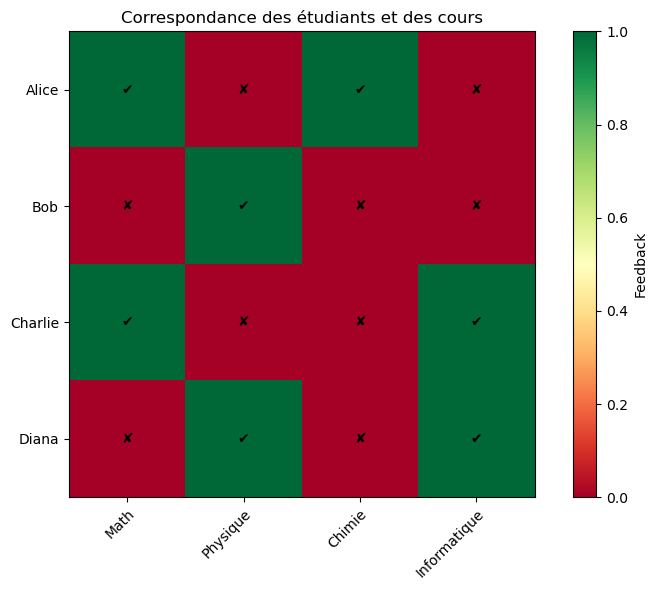

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Exemples de DataFrames
dataframe_etudiants = pd.DataFrame({'Etudiant': ['Alice', 'Bob', 'Charlie', 'Diana']})
dataframe_cours = pd.DataFrame({'Cours': ['Math', 'Physique', 'Chimie', 'Informatique']})
feedback = {
    'Math': ['Alice', 'Charlie'],
    'Physique': ['Bob', 'Diana'],
    'Chimie': ['Alice'],
    'Informatique': ['Charlie', 'Diana']
}

# Création des listes
etudiants = dataframe_etudiants['Etudiant'].tolist()
cours = dataframe_cours['Cours'].tolist()

# Matrice des couleurs (True si feedback trouvé, False sinon)
colors = np.zeros((len(etudiants), len(cours)), dtype=bool)

for i, etudiant in enumerate(etudiants):
    for j, cour in enumerate(cours):
        colors[i, j] = etudiant in feedback.get(cour, [])

# Création du diagramme
fig, ax = plt.subplots(figsize=(8, 6))
cmap = plt.cm.RdYlGn  # Rouge pour False, Vert pour True
im = ax.imshow(colors, cmap=cmap, interpolation='nearest')

# Configuration des axes
ax.set_xticks(np.arange(len(cours)))
ax.set_yticks(np.arange(len(etudiants)))
ax.set_xticklabels(cours)
ax.set_yticklabels(etudiants)

# Rotation des noms de colonnes (cours)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Ajout des valeurs dans les cases
for i in range(len(etudiants)):
    for j in range(len(cours)):
        text = "✔" if colors[i, j] else "✘"
        ax.text(j, i, text, ha="center", va="center", color="black")

# Titre et ajustement
ax.set_title("Correspondance des étudiants et des cours")
fig.tight_layout()
plt.colorbar(im, ax=ax, orientation="vertical", label="Feedback")
plt.show()